Визуализация семейств.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl

Настройка величины шрифта сразу для всех графиков. Это очень удобно, потому что изначально они достаточно мелкие.

In [29]:
large = 22; med = 18; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [6]:
AllMc0= pd.read_csv('datachanged/AllMc0C')
AllMc0 = AllMc0.drop(['Unnamed: 0'], axis = 1).copy()

In [30]:
AllMc0.head()

num_of_family   j      X(J)      Y(J)       E(J)      H(J)  A0         R  \
0               1   1 -3.013189 -7.227429   4.611031  1255.250   1  7.830392   
1               1   2 -1.310529 -2.563248  12.047700  1545.054   1  2.878841   
2               1   3 -2.178048 -2.144561   5.401844  3044.520   1  3.056638   
3               1   4 -0.965465 -0.082880   5.325506  4715.523   1  0.969016   
4               1   5 -1.621645  0.079540  15.935060  3044.520   1  1.623595   

   cnt         ER  sum_energy      lg_r    lg_e_r  
0   26  36.106180  370.199507  0.893784  1.557582  
1   26  34.683415  370.199507  0.459218  1.540122  
2   26  16.511481  370.199507  0.485244  1.217786  
3   26   5.160501  370.199507 -0.013669  0.712692  
4   26  25.872076  370.199507  0.210478  1.412831

In [47]:
AllExp= pd.read_csv('datachanged/AllExpC')
AllExp = AllExp.drop(['Unnamed: 0'], axis = 1).copy()

In [48]:
AllExp.head()

num_of_fam  j    X(J)    Y(J)    E(J)         R  cnt         ER  \
0            1  1  0.2513 -1.0370  20.896  1.067015   13  22.296342   
1            1  2  0.6003 -0.5482  13.749  0.812947   13  11.177213   
2            1  3  0.3081 -1.0631  11.535  1.106846   13  12.767464   
3            1  4  0.6618 -0.5704   6.129  0.873691   13   5.354850   
4            1  5  0.5843 -0.5611   8.619  0.810086   13   6.982133   

   sum_energy      lg_r    lg_e_r  
0       145.8  0.028170  1.348234  
1       145.8 -0.089938  1.048334  
2       145.8  0.044087  1.106105  
3       145.8 -0.058642  0.728747  
4       145.8 -0.091469  0.843988

Количество частиц в датасете. 

In [9]:
AllMc0.shape

(27157, 13)

Количество семейств в датасете. 

In [7]:
max(AllMc0[AllMc0.columns[0]])

1298

Вот у нас есть датасет с частицами, имеющими определенные координаты и энергии. Что, если мы хотим визуализировать отношения между этими тремя величинами? Нужно построить 3d представление.  

Возьмем подвыборку из всего большого датасета.  
Сначала попробуем обычный matplotlib.  

In [68]:
sample = min(len(AllExp), len(AllMc0))

In [83]:
df = AllMc0[['X(J)', 'Y(J)', 'E(J)', 'H(J)']]

In [82]:
df2 = AllExp[['X(J)', 'Y(J)', 'E(J)']]

В plt.scatter() есть аргумент "s",  с помощью которого можно задать символ и аргумент "c", с помощью которого можно задать цвет. 
https://realpython.com/visualizing-python-plt-scatter/  
https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.scatter.html

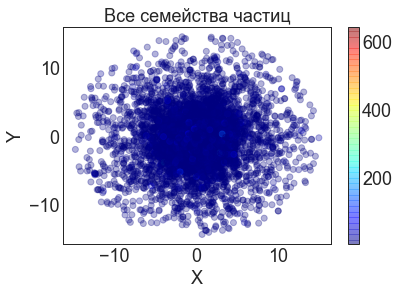

In [71]:
plt.scatter(df['X(J)'], df['Y(J)'], c = df['E(J)'], cmap = "jet", alpha = 0.3)
plt.title('Все семейства частиц')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

Все цвета сливаются. Почему? Посмотрим на гистограмму. 

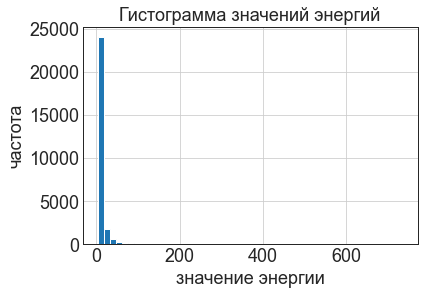

In [35]:
array = plt.hist(df['E(J)'], bins = 50)
plt.title('Гистограмма значений энергий')
plt.xlabel('значение энергии')
plt.ylabel('частота')
plt.grid()

Это происходит из-за того, что очень много значений, кроме того их больше в каком-то одном диапазоне энергии, а в остальных их мало. Но мы же хотим посмотреть все диапазоны. 

Когда мы строим гистограмму, она разбивает наш массив на диапазоны по бинам. Можно этим воспользоваться и сгенерировать свой цвет для каждого диапазона энергии.  

In [36]:
bins, values = array[0], array[1]

In [37]:
# Количество значений в диапазоне. Один диапазон - один цвет.
bins

array([2.4034e+04, 1.7980e+03, 5.8000e+02, 2.7000e+02, 1.4900e+02,
       1.0900e+02, 5.1000e+01, 4.3000e+01, 2.9000e+01, 1.8000e+01,
       1.0000e+01, 1.1000e+01, 6.0000e+00, 5.0000e+00, 3.0000e+00,
       6.0000e+00, 6.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00,
       2.0000e+00, 4.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
       3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00])

In [38]:
# Диапазон
values

array([  4.000067  ,  18.60714166,  33.21421632,  47.82129098,
        62.42836564,  77.0354403 ,  91.64251496, 106.24958962,
       120.85666428, 135.46373894, 150.0708136 , 164.67788826,
       179.28496292, 193.89203758, 208.49911224, 223.1061869 ,
       237.71326156, 252.32033622, 266.92741088, 281.53448554,
       296.1415602 , 310.74863486, 325.35570952, 339.96278418,
       354.56985884, 369.1769335 , 383.78400816, 398.39108282,
       412.99815748, 427.60523214, 442.2123068 , 456.81938146,
       471.42645612, 486.03353078, 500.64060544, 515.2476801 ,
       529.85475476, 544.46182942, 559.06890408, 573.67597874,
       588.2830534 , 602.89012806, 617.49720272, 632.10427738,
       646.71135204, 661.3184267 , 675.92550136, 690.53257602,
       705.13965068, 719.74672534, 734.3538    ])

Будем генерировать цвета, как рандомные числа. Зафиксируем SEED для воспроизводимости.  
https://pythonworld.ru/numpy/3.html  
https://stackoverflow.com/questions/7827530/array-of-colors-in-python  

In [84]:
def Creating_colors(particle_energy, bins = 50):
    
    np.random.seed(22)
    
    # Получаем границы интервалов значений и количество значений в бине гистограммы
    array = plt.hist(particle_energy, bins = bins)
    bins, values = array[0], array[1]
    mask = (bins!=0)*1
    
    m = []
    rm = []
    
    s_energy=sorted(particle_energy, reverse = True)
    
    # У каждого диапазона количество цветов должно соответствовать количеству точек, чтобы передать их в scatter
    for j in range(len(bins)):
        color = np.random.choice(range(256), size=3)
        
        # Сохраняем цвет для цветовой карты 
        rm+= [list(color/256)]*mask[j]
        
        # В scatter можно передать сразу массив цветов для каждой точки 
        color = list(color/256)+[1.0]
        tmp = [color]*int(bins[j]) 
        m+=tmp
        
    
    return m, rm, array[1] 

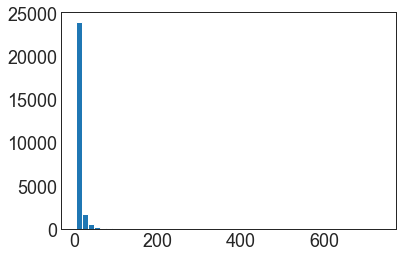

In [98]:
m, rm, values = Creating_colors(df['E(J)'], bins = 50)

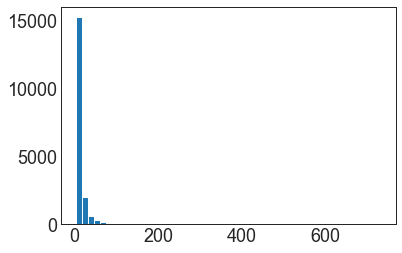

In [99]:
m2, rm2, values2 = Creating_colors(df2['E(J)'], bins = 50)

Теперь напишем функцию, которая выводит гистограмму и все диапазоны энергий с их цветами.  
https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html  
https://matplotlib.org/stable/tutorials/colors/colorbar_only.html#sphx-glr-tutorials-colors-colorbar-only-py  

In [100]:
# Создание своей карты по цветам
def creating_picture(m, rm, values):
    my_cmap = mpl.colors.ListedColormap(rm)
    
    # Поскольку для пустых диапазонов изначально не создавались цвета, нужно их убрать из карты
    mask = (bins!=0)*1
    copy = values.copy()

    for i in range(len(mask)):
        copy[i] = copy[i]*mask[i]
        copy[i+1] = copy[i+1]*mask[i]

    # Задаем Границы цветов по значениям энергий
    bounds = [c for c in copy if c != 0]
    
    fig, ax = plt.subplots(figsize=(15, 1))
    fig.subplots_adjust(bottom=0.5)

    norm = mpl.colors.BoundaryNorm(bounds, my_cmap.N, extend='both')
    
    return norm, my_cmap

<Figure size 1080x72 with 0 Axes>

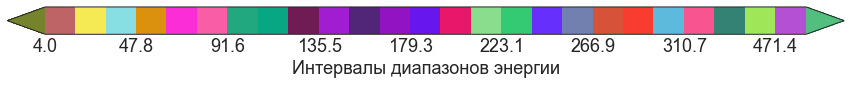

In [119]:
norm, my_cmap = creating_picture(m, rm, values)

plt.clf()
fig, ax = plt.subplots(figsize=(15, 1))
fig.subplots_adjust(bottom=0.5)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=my_cmap),
             cax=ax, orientation='horizontal',
             label="Интервалы диапазонов энергии")
plt.show()

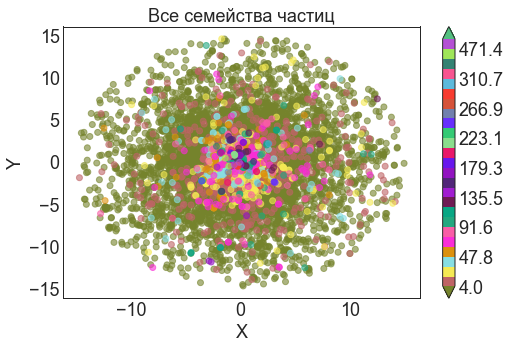

In [122]:
# Теперь получилась нужная карта
fig, ax = plt.subplots(figsize=(8, 5))
plt.title('Все семейства частиц')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(df['X(J)'], df['Y(J)'], c = m, alpha = 0.6)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=my_cmap))
plt.show()

<Figure size 1080x72 with 0 Axes>

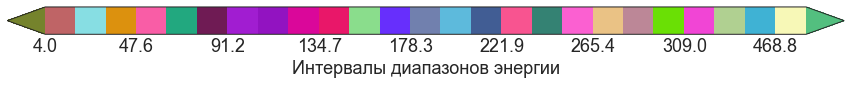

In [120]:
norm2, my_cmap2 = creating_picture(m2, rm2, values2)

plt.clf()
fig, ax = plt.subplots(figsize=(15, 1))
fig.subplots_adjust(bottom=0.5)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=my_cmap2),
             cax=ax, orientation='horizontal',
             label="Интервалы диапазонов энергии")
plt.show()

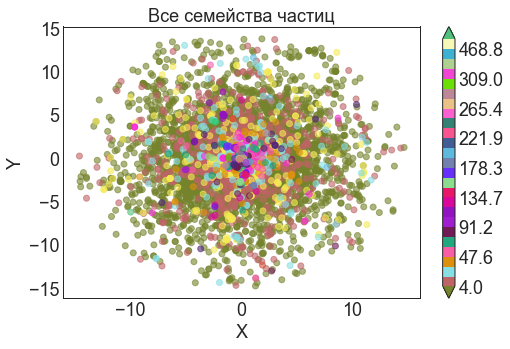

In [123]:
# Теперь получилась нужная карта
fig, ax = plt.subplots(figsize=(8, 5))
plt.title('Все семейства частиц')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(df2['X(J)'], df2['Y(J)'], c = m2, alpha = 0.6)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=my_cmap2))
plt.show()

matplotlib 3d  
https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html  
https://stackoverflow.com/questions/5495451/matplotlib-3d-scatter-plot-with-colorbar  

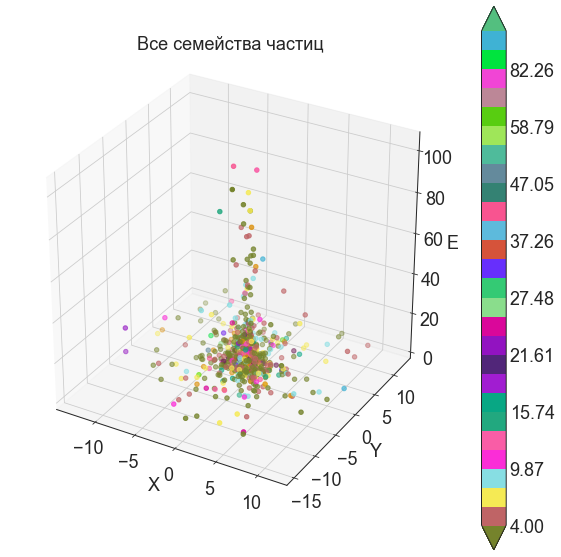

In [20]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

data = np.random.rand(3, 100)
x, y, z = df['X(J)'], df['Y(J)'], df['E(J)']  

p = ax.scatter(x, y, z, c=m, cmap=my_cmap)

plt.title('Все семейства частиц')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('E')

ax.set_box_aspect([np.ptp(i) for i in data])  # equal aspect ratio

# Устанавливаем нашу шкалу
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=my_cmap))

## Plotly  

При помощи библиотеки plotly можно построить 3d визуализацию, по оси Z расположены значения энергии.

In [21]:
# Все семейства в 3д с осью уровнем энергии
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode()

fig1 = go.Scatter3d(x=df['X(J)'],
                    y=df['Y(J)'],
                    z=df['E(J)'],
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                color = df['E(J)'],
                                colorscale='Viridis',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

mylayout = go.Layout(scene=dict(xaxis=dict( title="X coordinate"),
                                yaxis=dict( title="Y coordinate"),
                                zaxis=dict(title= "E energy")),)

plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("3DPlotAll.html"))

#fig1.write_image(f"images/all/3DPlotAllEnergy.png")
#fig1.write_html(f"web/all/3DPlotAllEnergy.html")

'3DPlotAll.html'

Предположим, что нужно рассмотреть каждое семейство по отдельности. В семействах также очень широкий разброс в значениях энергий, но там уже имеет смысл посмотреть и высоту последнего взаимодействия частицы, и метку этой высоты.    
https://plotly.com/python-api-reference/generated/plotly.express.scatter.html  
https://plotly.com/python/3d-scatter-plots/  
https://plotly.com/python/line-and-scatter/  
Соберём в одном примере несколько ее возможностей.  

In [10]:
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from plotly.validators.scatter.marker import SymbolValidator

In [11]:
OneFamily = AllMc0[AllMc0[AllMc0.columns[0]]== 518].copy()

In [12]:
# В один кластер объединяются точки, пришедшие с одной высоты.
labels = LabelEncoder().fit_transform(OneFamily['H(J)'])
OneFamily['cluster'] = labels

In [13]:
def Create_3d_plot(OneFamily, i):
    
    n = len(set(OneFamily["H(J)"]))
    
    #Позволяет вывести точки по отдельности вместо непрерывной шкалы
    OneFamily["cluster"] = OneFamily["cluster"].astype(str)
    
    title_name = f'Семейство {i}' 
    legend_name = f'{n} кластеров в семействе {i}'
    
    fig = px.scatter_3d(OneFamily, x='X(J)', y='Y(J)', z='H(J)', color='cluster', size = 'E(J)',
                        hover_data=["H(J)", "E(J)", "cluster"], opacity = 0.85 )
    
    # color - раскрашивает точки в цвета кластеров.
    # size - размер точки соответствует величине её энергии 
    # hover_data позволяет указать столбцы, которые мы хотим увидеть при наведении курсора на точку.
    
    fig.update_layout(
        title=title_name,
        title_font_size= 16, 
        legend_title=legend_name 
    )
    return fig

In [14]:
Create_3d_plot(OneFamily, 518).show()

In [25]:
np.random.seed(100)

def Create_px_plot(OneFamily, i, symbol = False):
    
    
    OneFamily["H(J)"] = OneFamily["H(J)"].astype(float).round(3)
    n = len(set(OneFamily["H(J)"]))
    
    
    OneFamily["H(J)"] = OneFamily["H(J)"].astype(str)
    OneFamily["cluster"] = OneFamily["cluster"].astype(str)
    
    title_name = f'Семейство {i}' 
    legend_name = f'{n} кластеров в семействе {i}'
    
    if not symbol:
        fig = px.scatter(OneFamily, x="X(J)", y="Y(J)", size="E(J)",   
                     color="cluster", hover_name="H(J)", hover_data =['cluster'], opacity = 0.85,  )
        
        # color - раскрашивает точки в цвета кластеров.
        # size - размер точки соответствует величине её энергии 
        # hover_name - имя всплывающего окна при наведении курсора
        # hover_data позволяет указать столбцы, которые мы хотим увидеть при наведении курсора на точку.
    
        
    else:
        # Можно добавить еще одно измерение - символы, выбрать или сгенерировать 
        
        raw_symbols = SymbolValidator().values
        
        sym = list(np.random.choice( raw_symbols , n ) )
        
        fig = px.scatter(OneFamily, x="X(J)", y="Y(J)", size="E(J)",   
                      color="H(J)", symbol = 'cluster', hover_name="H(J)", symbol_sequence = sym )
    
    
    fig.update_layout(
        title=title_name,
        title_font_size= 16 ,
        legend_title=legend_name,
        plot_bgcolor = 'white',
        paper_bgcolor = 'whitesmoke',
        font=dict(
            family='Verdana',
            size=12,
            color='black'
        ))
    if symbol == False:
        fig.write_image(f"images/web/one_family/family_{i}.png")
        fig.write_html(f"web/one_family/family_{i}.html")
    else:
        fig.write_image(f"images/web/one_family/family_symols_{i}.png")
        fig.write_html(f"web/one_family/family_symbols_{i}.html")
    return fig

In [26]:
Create_px_plot(OneFamily, 518, False)

In [27]:
Create_px_plot(OneFamily, 518, True)

In [18]:
import plotly.graph_objects as go

def Create_plot(OneFamily, i):
    
    n = len(set(OneFamily["H(J)"]))
    
    title_all =  f'Семейство {i}' 
    title_name = f'Семейство {i}' 
    #legend_name = f'{n} кластеров в семействе {i}'
    
    OneFamily["H(J)"] = OneFamily["H(J)"].astype(float).round(3)
    OneFamily["cluster"] = OneFamily["cluster"].astype(int)
    
    fig = go.Figure(
        data=go.Scatter(
                        x=OneFamily['X(J)'],
                        y=OneFamily['Y(J)'],
                        mode='markers',
                        # Размер круга по величине энергии
                        marker_size=OneFamily['E(J)'],
                        # Дополнительный текст поддерживает только одну колонку
                        hovertext=OneFamily[['H(J)']],
                        hoverlabel=dict(namelength=0),
                        # Дополнительная информация при выводе должна записываться в специальном формате
                        hovertemplate='X: %{x:} <br> Y: %{y:,} <br> E: %{marker.size:,} <br> H: %{hovertext} ',
                        # Определяем цвет точек, здесь нельзя сделать дискретную шкалу
            
                        marker=dict(
                                    color=OneFamily['cluster'],
                                    colorscale='Viridis',
                                    showscale=True,
                                    opacity=0.7,
                                    # Цвет огибающей круг линии
                                    line=dict(  color='DarkSlateGrey',
                                                width=1 )   
                           )
                        )
                     )
    
    
    fig.update_layout(
        
        title= title_name,
        title_font_size= 16 ,
        #legend_title=legend_name,
        xaxis_title='X(J)',
        yaxis_title='Y(J)',
        plot_bgcolor = 'white',
        paper_bgcolor = 'whitesmoke',
        font=dict(
            family='Verdana',
            size=12,
            color='black'
        )
    )
    
    #fig.show()
    return fig

In [19]:
Create_plot(OneFamily, 518)